In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [2]:
import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as smapi

In [59]:
df_tesla = pd.read_csv("data/TSLA.csv")
df_tesla.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,289.890015,292.589996,284.916656,287.806671,287.806671,60485100
1,2021-02-09,285.040009,286.600006,280.583344,283.153320,283.153320,45473100
2,2021-02-10,281.213318,281.606659,266.673340,268.273346,268.273346,108648300
3,2021-02-11,270.813324,276.626678,267.243347,270.553345,270.553345,64868400
4,2021-02-12,267.086670,272.443329,261.776672,272.040009,272.040009,71304900
5,2021-02-16,272.666656,273.666656,264.146667,265.406677,265.406677,59406900
6,2021-02-17,259.696655,266.613342,254.003326,266.049988,266.049988,77989500
7,2021-02-18,260.299988,264.896667,258.756653,262.459991,262.459991,53871300
8,2021-02-19,265.000000,265.596680,259.123322,260.433319,260.433319,56874900
9,2021-02-22,254.213333,256.166656,236.733337,238.166672,238.166672,111809100


In [47]:
df_tesla["Date"] = df_tesla.index
df_tesla = df_tesla[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df_tesla.reset_index(drop=True, inplace=True)
print(df_tesla.tail())

     Date        Open        High         Low       Close   Adj Close  \
498   498  164.570007  174.300003  162.779999  173.220001  173.220001   
499   499  173.889999  183.809998  169.929993  181.410004  181.410004   
500   500  187.330002  196.750000  182.610001  188.270004  188.270004   
501   501  183.949997  199.000000  183.690002  189.979996  189.979996   
502   502  193.009995  198.169998  189.919998  194.759995  194.759995   

        Volume  
498  196813500  
499  213806300  
500  217448300  
501  231684200  
502  186188100  


In [48]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    int64  
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 27.6 KB


In [49]:
df_tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,251.000000,255.543055,261.398138,248.948423,255.113618,255.113618,8.916259e+07
std,145.347859,61.443491,62.764296,59.797608,61.262473,61.262473,4.055190e+07
min,0.000000,103.000000,111.750000,101.809998,108.099998,108.099998,2.940180e+07
25%,125.500000,218.885002,223.048339,212.729996,218.041664,218.041664,6.298430e+07
50%,251.000000,244.833328,249.963333,239.346664,244.543335,244.543335,8.011980e+07
75%,376.500000,298.750000,304.158325,289.565002,296.856658,296.856658,1.003756e+08
max,502.000000,411.470001,414.496674,405.666656,409.970001,409.970001,3.056321e+08


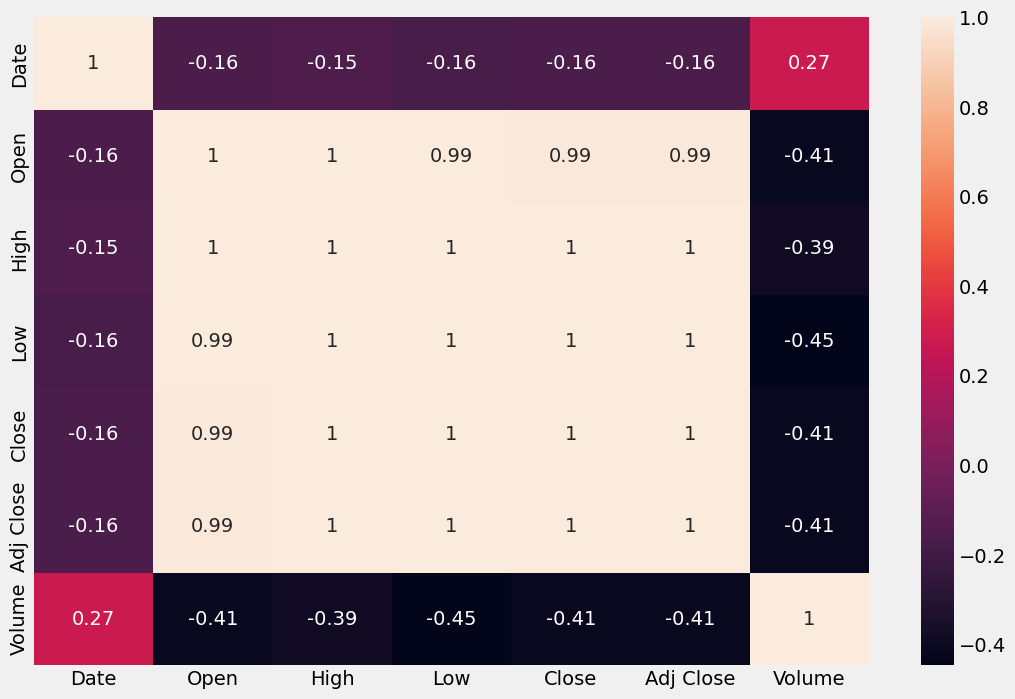

In [50]:
plt.figure(figsize=(12,8))
correlacion = df_tesla.corr()
sns.heatmap(data=correlacion, annot=True);

In [51]:
df_tesla = df_tesla[["Date", "Close"]]
print(df_tesla.head())

   Date       Close
0     0  287.806671
1     1  283.153320
2     2  268.273346
3     3  270.553345
4     4  272.040009


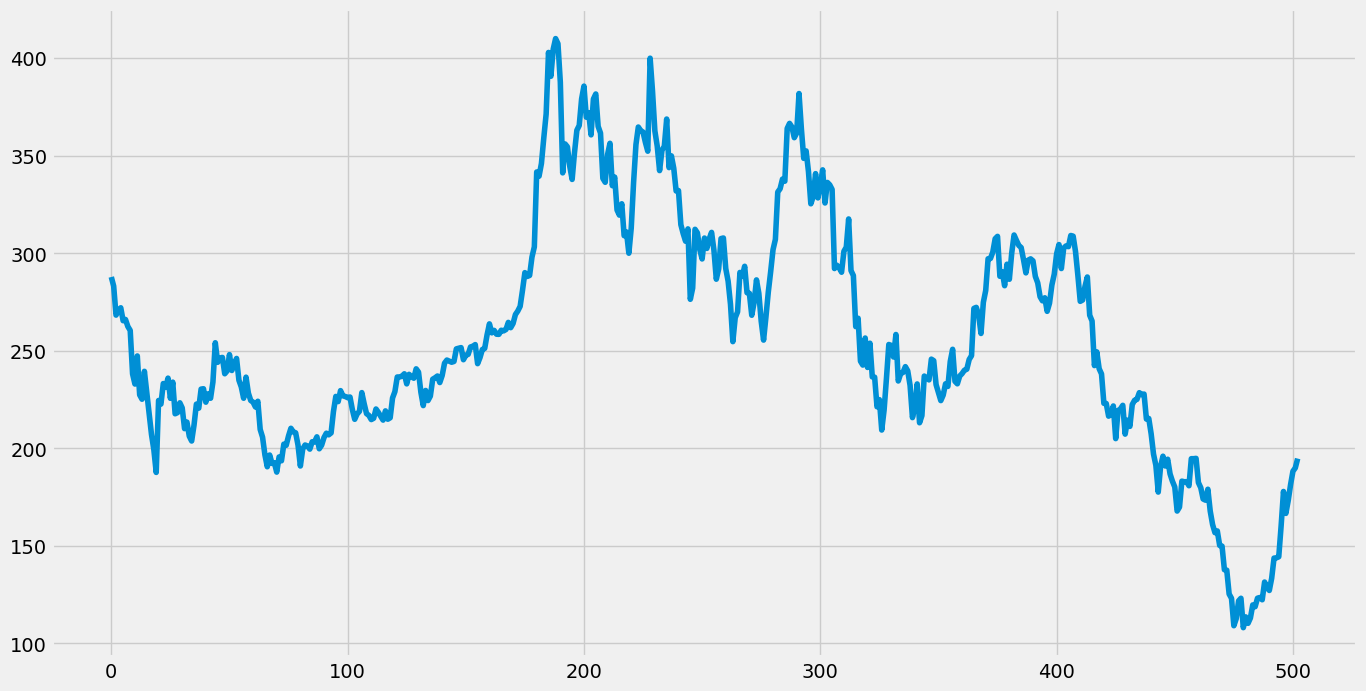

In [52]:
# representamos el cierre

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))
plt.plot(df_tesla["Date"], df_tesla["Close"]);

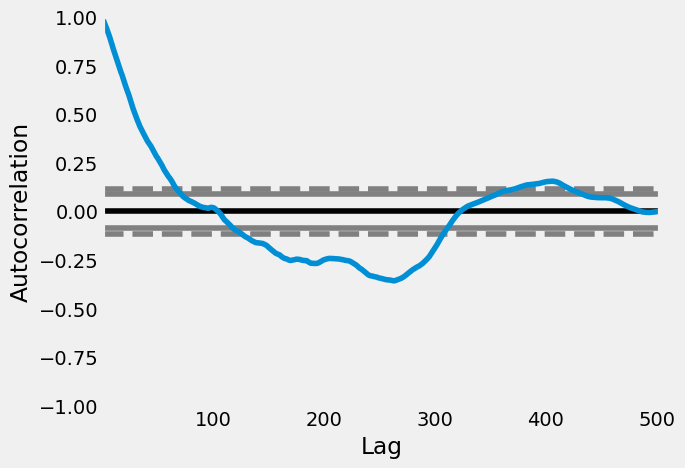

In [53]:
# es importante para los valores de p. baja por debajo de la 5ª raya asi que sera 5.

pd.plotting.autocorrelation_plot(df_tesla["Close"]);

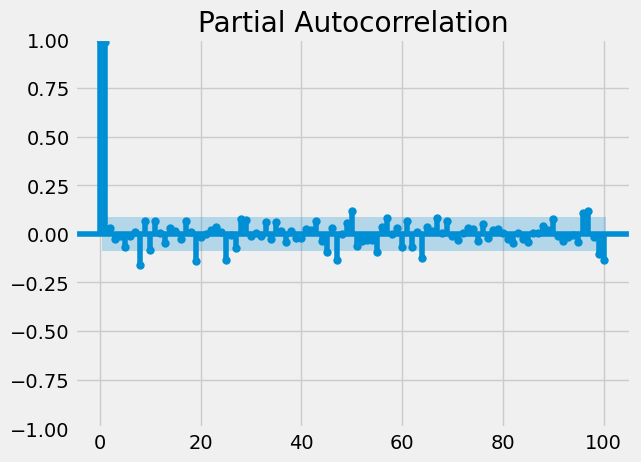

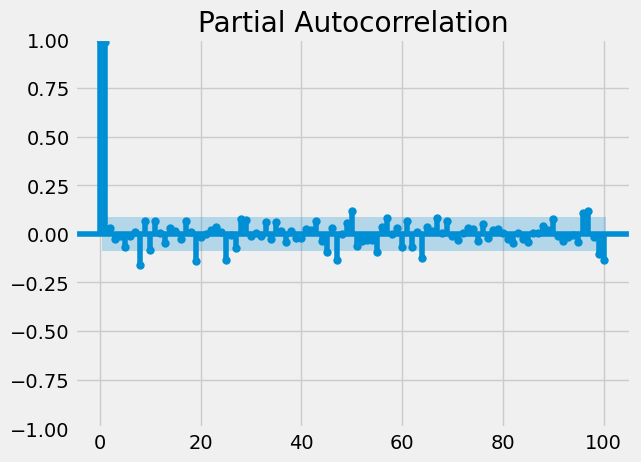

In [54]:
# valores de q. Sera 2 porque hay solo 2 rayas que son muy diferentes a las demas.

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_tesla["Close"], lags = 100)

In [55]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df_tesla['Close'],
                                order=(5, 1, 3),
                                seasonal_order=(5, 1, 3, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  503
Model:             SARIMAX(5, 1, 3)x(5, 1, 3, 12)   Log Likelihood               -1843.504
Date:                            Thu, 16 Feb 2023   AIC                           3721.008
Time:                                    23:57:47   BIC                           3792.313
Sample:                                         0   HQIC                          3749.012
                                            - 503                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6678      0.459     -3.632      0.000      -2.568      -0.768
ar.L2         -0.9629      0.769   

In [56]:
predictions = model.predict(len(df_tesla), len(df_tesla)+14) # 14 dias de prediccion
print(predictions)

503    192.831796
504    194.218435
505    195.947140
506    196.134218
507    198.189621
508    200.069726
509    200.221668
510    199.414116
511    201.519969
512    206.106356
513    204.381554
514    205.874536
515    204.879148
516    209.713847
517    206.622302
Name: predicted_mean, dtype: float64


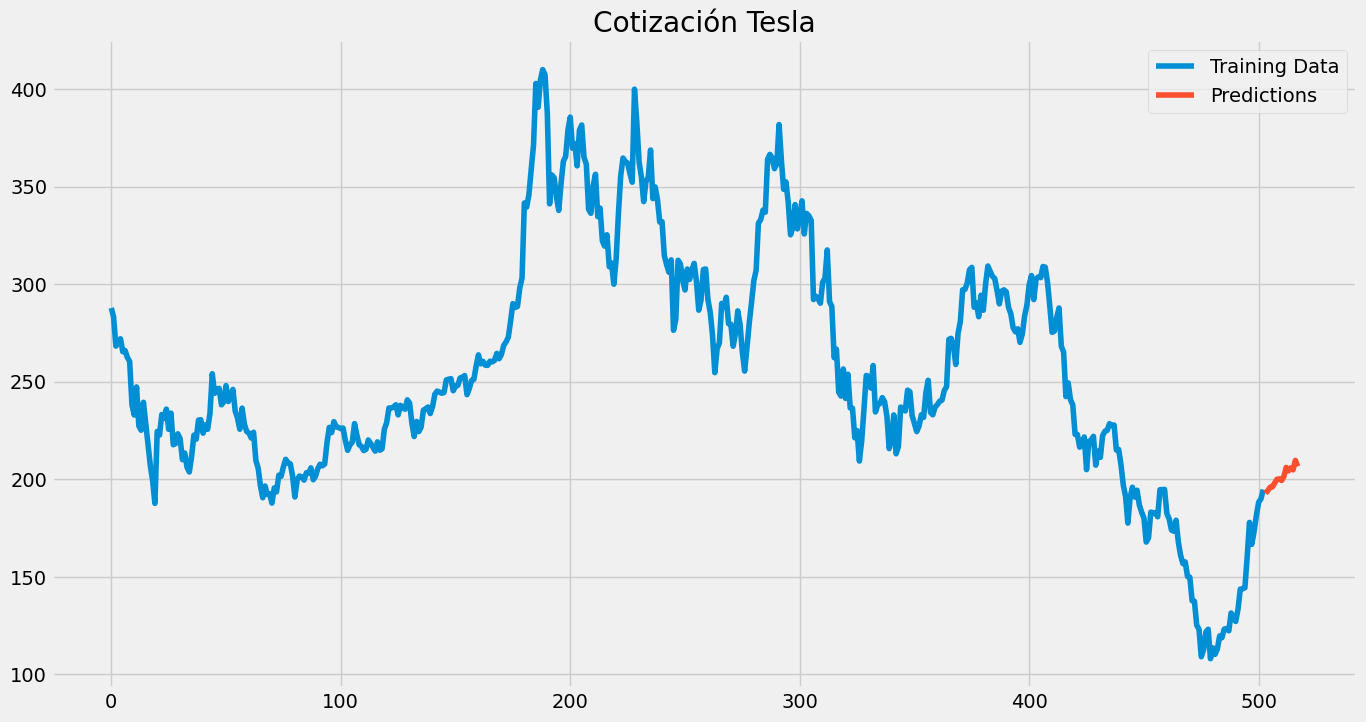

In [58]:
df_tesla["Close"].plot(legend=True, label="Training Data", figsize=(15, 8))
predictions.plot(legend=True, label="Predictions")
plt.title("Cotización Tesla");